In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
df = application_df.drop(columns = ['EIN', 'NAME'])
df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Binning rare categories
cutoff_value = 100
columns_to_bin = ["APPLICATION_TYPE", "CLASSIFICATION"]

for column in columns_to_bin:
    value_counts = df[column].value_counts()
    to_replace = value_counts[value_counts < cutoff_value].index
    df[column] = df[column].replace(to_replace, "Other")


In [ ]:
df_dummies = pd.get_dummies(df)
df_dummies

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
34295,1,5000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
34296,1,5000,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34297,1,5000,1,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
X = df.drop("IS_SUCCESSFUL", axis=1)
y = df["IS_SUCCESSFUL"]

In [ ]:
# Split our preprocessed data into our features and target arrays
X_train, X_test, y_train, y_test = train_test_split(X, y)
# Split the preprocessed data into a training and testing dataset


In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1)


In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Define an optimized model
nn_optimized = tf.keras.models.Sequential()

# Input layer and first hidden layer
nn_optimized.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn_optimized.add(tf.keras.layers.Dense(units=8, activation="relu"))

# Third hidden layer (optional)
nn_optimized.add(tf.keras.layers.Dense(units=4, activation="tanh"))

# Output layer
nn_optimized.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_optimized.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the optimized model
history = nn_optimized.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6729 - loss: 0.6176 - val_accuracy: 0.4689 - val_loss: nan
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7256 - loss: 0.5639 - val_accuracy: 0.4689 - val_loss: nan
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7266 - loss: 0.5573 - val_accuracy: 0.4689 - val_loss: nan
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7279 - loss: 0.5560 - val_accuracy: 0.4689 - val_loss: nan
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7318 - loss: 0.5524 - val_accuracy: 0.4689 - val_loss: nan
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7297 - loss: 0.5516 - val_accuracy: 0.4689 - val_loss: nan
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7304 - loss: 0.5505 - val_accuracy: 0.4689 - val_loss: nan
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7330 - loss: 0.5447 - val_accuracy: 0.4689 - val_lo

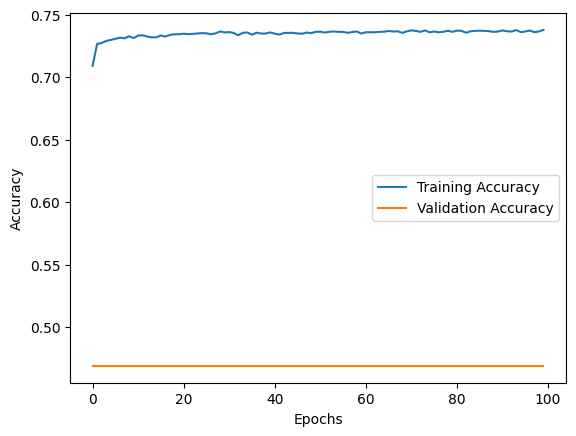

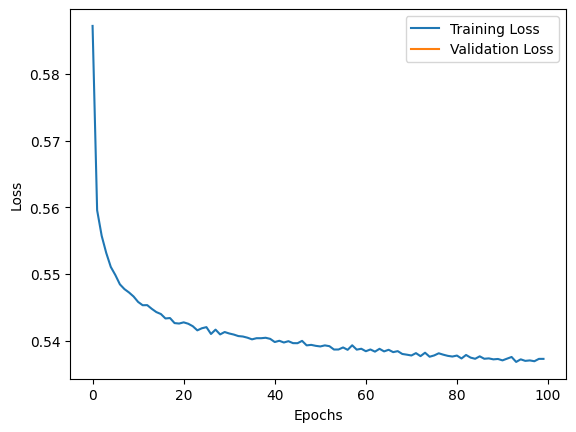

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_optimized.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 1ms/step - accuracy: 0.4689 - loss: nan
Loss: nan, Accuracy: 0.4689212739467621


In [ ]:
from google.colab import files
files.download("AlphabetSoupCharity_Optimization.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
nn_optimized.save("AlphabetSoupCharity_Optimization.h5")